In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("rstb20190209_si_001.csv")
df

,Shell Length (mm),Lifespan (years),Pleistocene Locality,State
0,35.01,NaN,Holland Point,VA
1,35.02,NaN,Holland Point,VA
2,35.03,NaN,Holland Point,VA
3,35.08,NaN,Holland Point,VA
4,35.09,NaN,Holland Point,VA
...,...,...,...,...
678,183.52,16.00,Holland Point,VA
679,196.85,12.99,Wailes Bluff,MD
680,203.23,NaN,Holland Point,VA
681,216.16,NaN,Holland Point,VA


In [3]:
df.dropna(axis=0, how='any', inplace=True)
df
#get rid of rows w/o any lifespan data (NaN)

,Shell Length (mm),Lifespan (years),Pleistocene Locality,State
158,52.10,1.00,Cherry Point,VA
186,57.15,2.67,Wailes Bluff,MD
204,60.60,2.00,Holland Point,VA
214,62.98,4.66,Wailes Bluff,MD
216,63.10,5.33,Wailes Bluff,MD
...,...,...,...,...
662,167.45,17.00,Holland Point,VA
665,168.50,10.00,Holland Point,VA
668,169.47,9.00,Holland Point,VA
678,183.52,16.00,Holland Point,VA


In [4]:
df['Shell Length (in)'] = df['Shell Length (mm)'] / 25.4
df
#convert to inches, in graphs I used mm for SI units

,Shell Length (mm),Lifespan (years),Pleistocene Locality,State,Shell Length (in)
158,52.10,1.00,Cherry Point,VA,2.051181
186,57.15,2.67,Wailes Bluff,MD,2.250000
204,60.60,2.00,Holland Point,VA,2.385827
214,62.98,4.66,Wailes Bluff,MD,2.479528
216,63.10,5.33,Wailes Bluff,MD,2.484252
...,...,...,...,...,...
662,167.45,17.00,Holland Point,VA,6.592520
665,168.50,10.00,Holland Point,VA,6.633858
668,169.47,9.00,Holland Point,VA,6.672047
678,183.52,16.00,Holland Point,VA,7.225197


(40.0, 200.0)

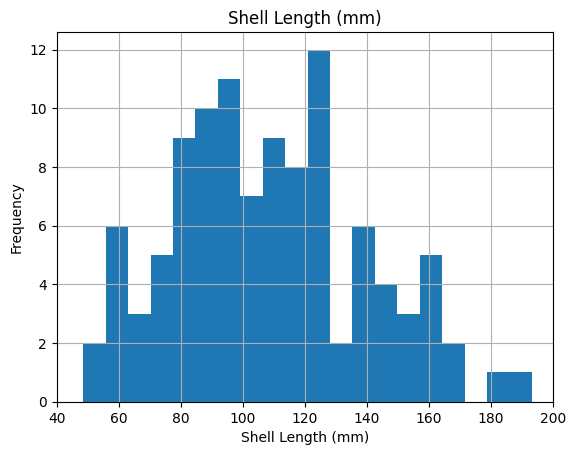

In [5]:
df.hist(column='Shell Length (mm)', bins = 20, align = 'left')
plt.xlabel('Shell Length (mm)')
plt.ylabel('Frequency')
plt.xlim(40,200)

In [6]:
print (df['Pleistocene Locality'].value_counts())

Pleistocene Locality
Holland Point    62
Wailes Bluff     35
Cherry Point      9
Name: count, dtype: int64


Text(0.5, 1.0, 'Shell Length vs. Lifespan')

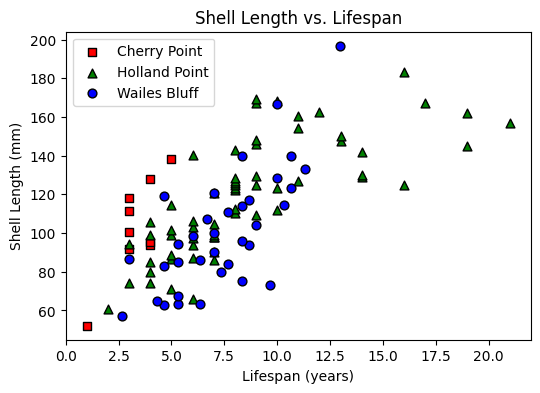

In [7]:
fig, ax = plt.subplots( figsize=(6,4))
color_local = {'Holland Point': 'g', 'Wailes Bluff' : 'b', 'Cherry Point' : 'r'} 
marker_local = {'Holland Point': "^", 'Wailes Bluff' : "o", 'Cherry Point' : 's'}

for locality, grouped in df.groupby(by='Pleistocene Locality'): 
    grouped.plot.scatter(x= 'Lifespan (years)', y='Shell Length (mm)', 
                         color=color_local[locality],marker=marker_local[locality], 
                         edgecolor='k',s=40, ax=ax, legend=True, label=locality) 

ax.set_title('Shell Length vs. Lifespan')